In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#### Ejercicio 3.3

Escribir funciones de <code>Python</code> que calculen la solucion de un sistema:

a) $Ly = b$, siendo $L$ triangular inferior.

b) $Ux = y$, siendo $U$ triangular superior.

In [2]:
def solveLy(L: np.array, b:np.array) -> np.array:
    n = L.shape[0]
    y = np.zeros(n)
    for i in range(n):
        sum_ = 0 
        for j in range(i):
            sum_ += L[i][j]*y[j]
        y[i] = (b[i] - sum_ ) / L[i][i]
    return y

def solveUx(U: np.array, x:np.array) -> np.array:
    n = U.shape[0]
    x = np.zeros(n)
    for i in range(n):
        sum_ = 0 
        for j in range(i+1):
            sum_ += U[i][j] * x[j]
        x[i] = (y[i] - sum_)/U[i][i]
    return x
    
L = np.array([[1,0,0],
              [1,2,0],
              [2,1,4]])
U = np.array([[1,2,5],
              [0,2,1],
              [0,0,1]])
b = np.array([1,2,3])

print(y := solveLy(L, b.T))
print(x := solveUx(U, y.T))

[1.    0.5   0.125]
[1.    0.25  0.125]


#### Ejercicio 3.4

Escribir funciones de <code>Python</code> que realicen las siguientes tareas: 

(a) Calcular la descomposicion $LU$ de una matriz dada $A$, asumiendo que no es necesario realizar pivoteos. 

(b) Resolver un sistema $Ax = b$, utilizando la funcion del ıtem anterior y las del ejercicio 3.3. Aplicar esta funcion para resolver el ıtem (c) del ejercicio 2

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [4]:
def doolittleLU(A: np.array) -> tuple[np.array, np.array]:
    n = len(A)
    L = np.zeros((n,n))
    U = np.zeros((n,n))
    
    for i in range(n):
        for j in range(i,n):
            U[i,j] = A [i,j] - sum(L[i,k] * U[k,j] for k in range(i))
        for j in range(i, n):
            if (i == j):
                L[i,i] = 1
            else:
                L[j,i] = (A[j,i] - sum(L[j,k] * U[k,i] for k in range(i))) / U[i,i]
    return L, U



In [5]:
A = np.array([[3,2,3],[6,2,2],[5,6,3]])
L, U = doolittleLU(np.array([[3,2,3],[6,2,2],[5,6,3]]))
         
print(L)
print(U)


[[ 1.          0.          0.        ]
 [ 2.          1.          0.        ]
 [ 1.66666667 -1.33333333  1.        ]]
[[ 3.          2.          3.        ]
 [ 0.         -2.         -4.        ]
 [ 0.          0.         -7.33333333]]


In [6]:
L@U == A

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

Felicidad :thumbsup:

#### Ejercicio 3.20

Sea $u \in \mathbb{R}^n$ un vector tal que $\|u\|_2 = 1$ y sea $H = I - 2uu^T$ un reflector ortogonal de Householder.

##### Parte (a)

Siendo $u = e_i$, calcular explícitamente $H$ e interpretar geométricamente $Hx$ para cualquier $x \in \mathbb{R}^n$.

##### Parte (b)

Sea $x$ tal que $x = w + v$, con $w$ ortogonal a $u$ y $v$ múltiplo de $u$. Mostrar que 

$$Hx = w - v$$


e interpretar geométricamente en $\mathbb{R}^n$.


In [7]:
# Parte (a) del enunciado
def householder(dim: int, pos: int):
    n = dim
    I = np.identity(n)
    # fix solidisimo (n) -> ((n,1))
    u = np.zeros((n,1)) 
    u[pos] = 1
    H = I - (2 * u @ u.T)
    return H

In [8]:
householder(4,1)

array([[ 1.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

Funciona!! Ahora sigamos con la parte (a) del enunciado, que es interpretarlo graficamente en $R^2$ porque no quiero usar $R^3$.


In [9]:
def graficarHouseholder(dim: int, pos:int, x: np.array):
    H = householder(dim, pos)
    reflexionHH = H @ x
    plt.figure(figsize=(6,6))
    
    # plotear el vector original
    plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector original $x$')
    
    # plotear el vector reflejado
    plt.quiver(0, 0, reflexionHH[0], reflexionHH[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector reflejado $Hx$')
    
    # plotear la linea de reflexion
    if dim == 2:
        # tuvo que cookear gpt pues no le se al quiver
        u = np.zeros(dim)
        u[i] = 1        
        line_vector = np.array([-u[1], u[0]])  
        line_length = 2
        plt.quiver(0, 0, line_vector[0], line_vector[1], angles='xy', scale_units='xy', scale=line_length, color='g', label='Linea de reflexion')

    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.grid()
    plt.title('Interpretacion geometrica de la reflexion de Householder')
    plt.legend()
    plt.show()

NameError: name 'i' is not defined

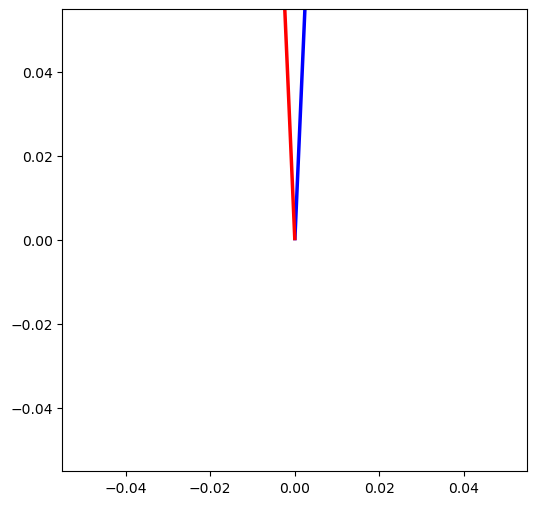

In [10]:
x = np.random.rand(2)
x /= np.linalg.norm(x)
graficarHouseholder(2, 0, x)
graficarHouseholder(2, 1, x)

No termino de entender muy bien que vendria a ser el vector rojo, si bien entiendo que esta reflejado por el vector vrde, no entiendo que hace xd.


#### Ejercicio 3.21

Implementar dos programas que calculen la descomposición QR de una matriz:

(a) Aplicando de manera directa el método de ortonormalización de Gram-Schmidt.

(b) Utilizando transformaciones de Householder.

Generar algunas matrices aleatorias y comparar las descomposiciones arrojadas por estos programas con las dadas por el comando `np.linalg.qr`. ¿Qué se observa?


#### Ejercicio 3.22

Implementar un programa que resuelva un sistema $Ax = b$ a partir de la descomposición QR de $A$.
